In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image


In [8]:
df=pd.read_csv('F:\E-Commerce-Product-Recommendations\dataset\Amazon-Products.csv')

In [9]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [10]:
df['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

In [14]:
Image.open(df['image'][0])

OSError: [Errno 22] Invalid argument: 'https://m.media-amazon.com/images/I/31UISB90sYL._AC_UL320_.jpg'

In [16]:
from PIL import Image
import requests
from io import BytesIO

# URL of the image
url = 'https://m.media-amazon.com/images/I/31UISB90sYL._AC_UL320_.jpg'

# Fetch the image
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Display the image (optional)
image.show()


In [19]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('F:\E-Commerce-Product-Recommendations\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:\E-Commerce-Product-Recommendations\dataset\Air Conditioners.csv
F:\E-Commerce-Product-Recommendations\dataset\All Appliances.csv
F:\E-Commerce-Product-Recommendations\dataset\All Books.csv
F:\E-Commerce-Product-Recommendations\dataset\All Car and Motorbike Products.csv
F:\E-Commerce-Product-Recommendations\dataset\All Electronics.csv
F:\E-Commerce-Product-Recommendations\dataset\All English.csv
F:\E-Commerce-Product-Recommendations\dataset\All Exercise and Fitness.csv
F:\E-Commerce-Product-Recommendations\dataset\All Grocery and Gourmet Foods.csv
F:\E-Commerce-Product-Recommendations\dataset\All Hindi.csv
F:\E-Commerce-Product-Recommendations\dataset\All Home and Kitchen.csv
F:\E-Commerce-Product-Recommendations\dataset\All Movies and TV Shows.csv
F:\E-Commerce-Product-Recommendations\dataset\All Music.csv
F:\E-Commerce-Product-Recommendations\dataset\All Pet Supplies.csv
F:\E-Commerce-Product-Recommendations\dataset\All Sports Fitness and Outdoors.csv
F:\E-Commerce-Product-Recommen

In [20]:
import pandas as pd
import numpy as np
import re
import sys
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
FILE_PATH = "dataset/All Electronics.csv"
prod_df = pd.read_csv(FILE_PATH)

print("Initial dataset shape:", prod_df.shape)

Initial dataset shape: (9600, 9)


In [22]:
prod_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


In [23]:
print("Unique main_categories   :", prod_df['main_category'].unique())
print("Unique sub_categories    :", prod_df['sub_category'].unique())

Unique main_categories   : ['tv, audio & cameras']
Unique sub_categories    : ['All Electronics']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [25]:
df['ratings_cleaned'] = (
    df['ratings']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  
    .replace('', np.nan)                    
    .astype(float)                          
)

df['no_of_ratings_cleaned'] = (
    df['no_of_ratings']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)  
    .replace('', np.nan)
    .astype(float)
)

df['discount_price_cleaned'] = (
    df['discount_price']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

df['actual_price_cleaned'] = (
    df['actual_price']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

df[['ratings_cleaned','no_of_ratings_cleaned','discount_price_cleaned','actual_price_cleaned']].describe()

,ratings_cleaned,no_of_ratings_cleaned,discount_price_cleaned,actual_price_cleaned
count,369582.000000,372495.000000,4.904220e+05,5.337720e+05
mean,3.837409,834.780161,7.039011e+03,4.825101e+04
std,1.010237,8620.775920,7.180614e+04,1.355316e+07
min,1.000000,1.000000,8.000000e+00,0.000000e+00
25%,3.500000,4.000000,3.990000e+02,9.900000e+02
50%,3.900000,20.000000,6.990000e+02,1.599000e+03
75%,4.300000,131.000000,1.499000e+03,3.000000e+03
max,100.000000,589547.000000,1.065632e+07,9.900000e+09


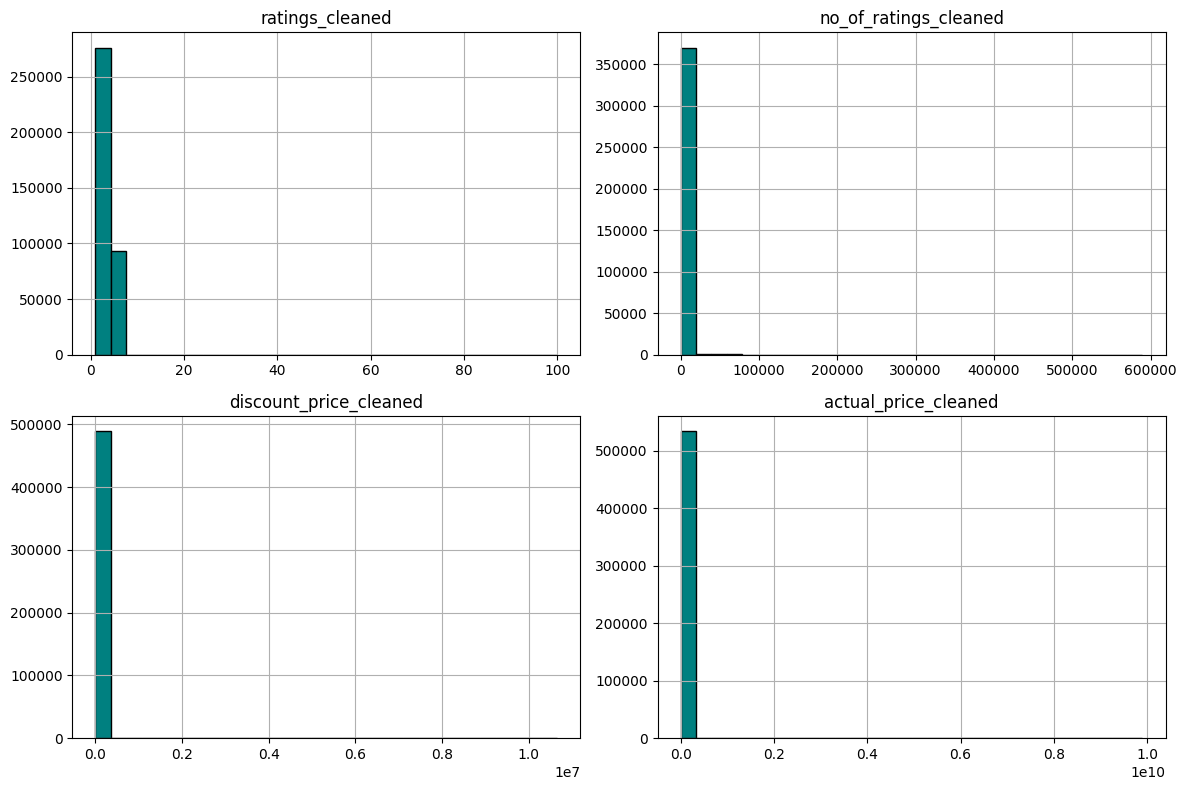

In [26]:
numeric_cols = ['ratings_cleaned','no_of_ratings_cleaned','discount_price_cleaned','actual_price_cleaned']
df[numeric_cols].hist(bins=30, figsize=(12,8), color='teal', edgecolor='black')
plt.tight_layout()
plt.show()

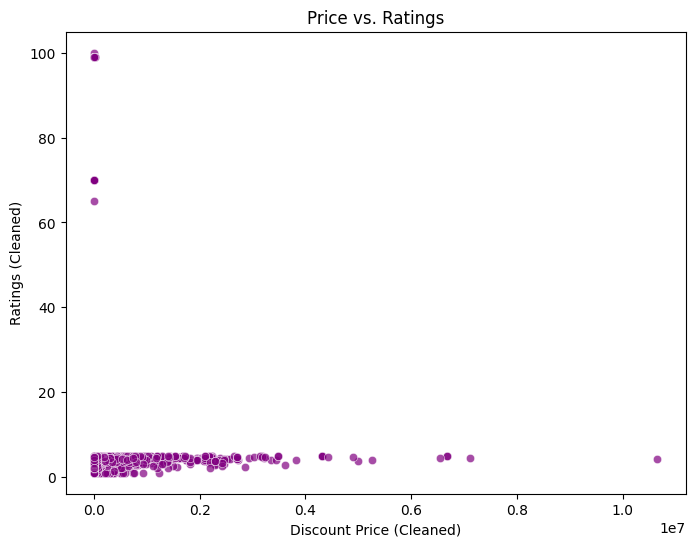

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['discount_price_cleaned'], 
    y=df['ratings_cleaned'], 
    alpha=0.7, 
    color='purple'
)
plt.xlabel("Discount Price (Cleaned)")
plt.ylabel("Ratings (Cleaned)")
plt.title("Price vs. Ratings")
plt.show()

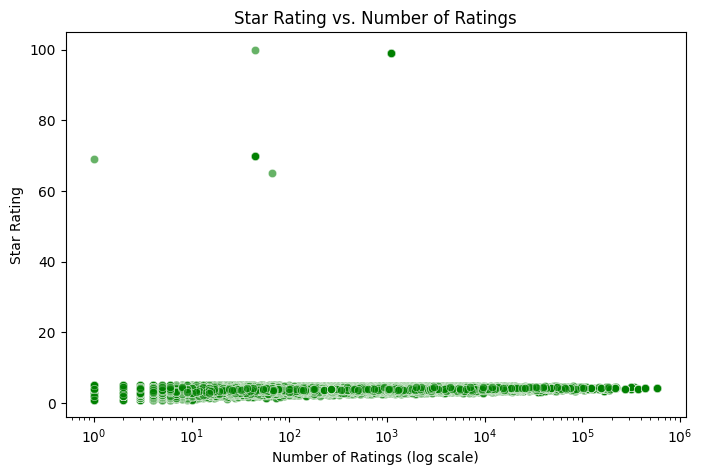

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['no_of_ratings_cleaned'], 
    y=df['ratings_cleaned'],
    alpha=0.6, 
    color='green'
)
plt.xscale('log')
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Star Rating")
plt.title("Star Rating vs. Number of Ratings")
plt.show()

In [29]:
top_10_rated = df.sort_values(by='no_of_ratings_cleaned', ascending=False).head(10)
display(top_10_rated[['name','no_of_ratings','ratings','discount_price','actual_price']])

,name,no_of_ratings,ratings,discount_price,actual_price
70497,SanDisk 128GB Class 10 microSDXC Memory Card w...,"589,547",4.3,"₹1,705","₹3,999"
73153,SanDisk 256GB Class 10 MicroSD Card with Adapt...,"589,547",4.3,"₹3,324","₹7,999"
61338,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"589,547",4.3,₹523,₹700
61071,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"589,547",4.3,₹750,"₹1,000"
60917,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"589,547",4.3,₹495,₹500
71417,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"589,547",4.3,₹523,₹700
71008,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"589,547",4.3,₹750,"₹1,000"
60737,SanDisk 128GB Class 10 microSDXC Memory Card w...,"589,547",4.3,"₹1,705","₹3,999"
70773,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"589,547",4.3,₹495,₹500
68452,SanDisk 512GB Ultra MicroSDXC UHS-I Memory Car...,"589,547",4.3,"₹8,022","₹15,000"


In [30]:
!pip install wordcloud

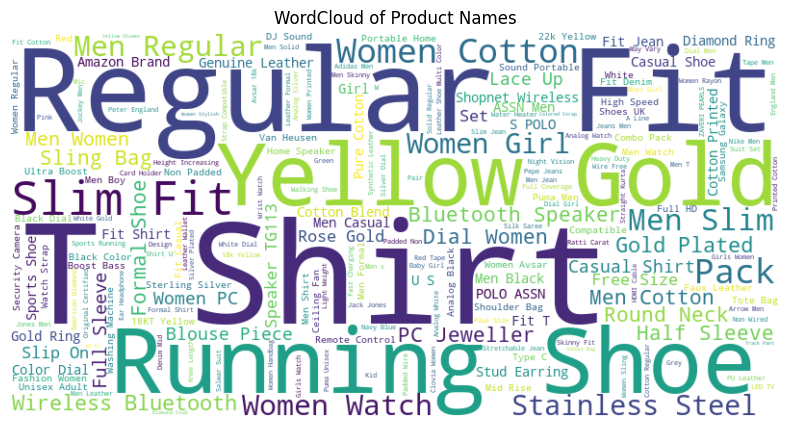

In [31]:
from wordcloud import WordCloud

all_names = " ".join(df['name'].astype(str).fillna(""))
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords={'with','for','and','in','to','of','the','by'}  # add any relevant stops
).generate(all_names)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Product Names")
plt.show()